In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time module.
import time

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b48ac97ac693ad65e8d5f617f1b051ed


In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        ->city_desc = city_weather["weather"]["description"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          -> "Description": city_desc,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | dikson
Processing Record 2 of Set 13 | vestbygda
City not found. Skipping...
Processing Record 3 of Set 13 | khatanga
Processing Record 4 of Set 13 | rikitea
Processing Record 5 of Set 13 | sao jose da coroa grande
Processing Record 6 of Set 13 | pierre
Processing Record 7 of Set 13 | luganville
Processing Record 8 of Set 13 | mataura
Processing Record 9 of Set 13 | punta arenas
Processing Record 10 of Set 13 | broome
Processing Record 11 of Set 13 | colombia
Processing Record 12 of Set 13 | verkhnevilyuysk
Processing Record 13 of Set 13 | gabu
Processing Record 14 of Set 13 | xinpu
Processing Record 15 of Set 13 | naftah
City not found. Skipping...
Processing Record 16 of Set 13 | east london
Processing Record 17 of Set 13 | zhezkazgan
Processing Record 18 of Set 13 | kuytun
Processing Record 19 of Set 13 | atuona
Processing Record 20 of Set 13 | puerto ayora
Processing Record 21 of Set 13 | ca

Processing Record 32 of Set 16 | nizhneyansk
City not found. Skipping...
Processing Record 33 of Set 16 | dianopolis
City not found. Skipping...
Processing Record 34 of Set 16 | bathsheba
Processing Record 35 of Set 16 | kuche
City not found. Skipping...
Processing Record 36 of Set 16 | amderma
City not found. Skipping...
Processing Record 37 of Set 16 | komsomolskiy
Processing Record 38 of Set 16 | luderitz
Processing Record 39 of Set 16 | tutoia
Processing Record 40 of Set 16 | pangnirtung
Processing Record 41 of Set 16 | hami
Processing Record 42 of Set 16 | airai
Processing Record 43 of Set 16 | port hedland
Processing Record 44 of Set 16 | anadyr
Processing Record 45 of Set 16 | beloha
Processing Record 46 of Set 16 | hofn
Processing Record 47 of Set 16 | gamba
Processing Record 48 of Set 16 | jamestown
Processing Record 49 of Set 16 | vaitupu
City not found. Skipping...
Processing Record 50 of Set 16 | bacolod
Processing Record 1 of Set 17 | taiyuan
Processing Record 2 of Set 17 

Processing Record 18 of Set 20 | leningradskiy
Processing Record 19 of Set 20 | arraial do cabo
Processing Record 20 of Set 20 | hamina
Processing Record 21 of Set 20 | half moon bay
Processing Record 22 of Set 20 | margate
Processing Record 23 of Set 20 | mount gambier
Processing Record 24 of Set 20 | gospic
Processing Record 25 of Set 20 | zhanakorgan
Processing Record 26 of Set 20 | ambilobe
Processing Record 27 of Set 20 | yekaterinoslavka
Processing Record 28 of Set 20 | port lincoln
Processing Record 29 of Set 20 | neiafu
Processing Record 30 of Set 20 | antofagasta
Processing Record 31 of Set 20 | veraval
Processing Record 32 of Set 20 | san andres
Processing Record 33 of Set 20 | san patricio
Processing Record 34 of Set 20 | bairiki
Processing Record 35 of Set 20 | suntar
Processing Record 36 of Set 20 | alta floresta
Processing Record 37 of Set 20 | iqaluit
Processing Record 38 of Set 20 | cabo san lucas
Processing Record 39 of Set 20 | chapais
Processing Record 40 of Set 20 |

Processing Record 1 of Set 24 | pervoye maya
Processing Record 2 of Set 24 | george town
Processing Record 3 of Set 24 | nianzishan
Processing Record 4 of Set 24 | teplodar
Processing Record 5 of Set 24 | denau
City not found. Skipping...
Processing Record 6 of Set 24 | morondava
Processing Record 7 of Set 24 | balimo
City not found. Skipping...
Processing Record 8 of Set 24 | kupino
Processing Record 9 of Set 24 | buckeye
Processing Record 10 of Set 24 | claveria
Processing Record 11 of Set 24 | sayat
Processing Record 12 of Set 24 | salisbury
Processing Record 13 of Set 24 | aktash
Processing Record 14 of Set 24 | krasnozatonskiy
Processing Record 15 of Set 24 | imbituba
Processing Record 16 of Set 24 | kuching
Processing Record 17 of Set 24 | singaparna
Processing Record 18 of Set 24 | pisco
Processing Record 19 of Set 24 | andros town
Processing Record 20 of Set 24 | port hueneme
Processing Record 21 of Set 24 | nemuro
Processing Record 22 of Set 24 | hun
Processing Record 23 of Se

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dikson,73.51,80.55,-5.93,90,10,17.05,RU,2020-02-21 04:20:15
1,Khatanga,71.97,102.50,4.42,95,100,9.37,RU,2020-02-21 04:20:16
2,Rikitea,-23.12,-134.97,78.60,75,80,11.27,PF,2020-02-21 04:20:16
3,Sao Jose Da Coroa Grande,-8.90,-35.15,81.23,76,100,7.63,BR,2020-02-21 04:20:17
4,Pierre,44.37,-100.35,28.40,58,1,5.82,US,2020-02-21 04:19:01
5,Luganville,-15.53,167.17,86.00,66,40,6.93,VU,2020-02-21 04:20:18
6,Mataura,-46.19,168.86,60.01,78,65,24.00,NZ,2020-02-21 04:20:18
7,Punta Arenas,-53.15,-70.92,53.60,71,75,23.04,CL,2020-02-21 04:16:20
8,Broome,42.25,-75.83,16.00,78,20,4.70,US,2020-02-21 04:20:19
9,Colombia,20.99,-77.43,71.60,94,0,3.36,CU,2020-02-21 04:20:20


In [8]:
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp", "Humidity","Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dikson,RU,2020-02-21 04:20:15,73.51,80.55,-5.93,90,10,17.05
1,Khatanga,RU,2020-02-21 04:20:16,71.97,102.50,4.42,95,100,9.37
2,Rikitea,PF,2020-02-21 04:20:16,-23.12,-134.97,78.60,75,80,11.27
3,Sao Jose Da Coroa Grande,BR,2020-02-21 04:20:17,-8.90,-35.15,81.23,76,100,7.63
4,Pierre,US,2020-02-21 04:19:01,44.37,-100.35,28.40,58,1,5.82
...,...,...,...,...,...,...,...,...,...
551,Port Macquarie,AU,2020-02-21 04:24:14,-31.43,152.92,78.01,57,40,13.87
552,Braganca Paulista,BR,2020-02-21 04:25:01,-22.94,-46.56,71.60,100,100,4.45
553,Sergeyevka,KZ,2020-02-21 04:25:02,53.88,67.42,16.59,95,100,6.62
554,Dudinka,RU,2020-02-21 04:25:02,69.41,86.18,14.00,85,85,6.71


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

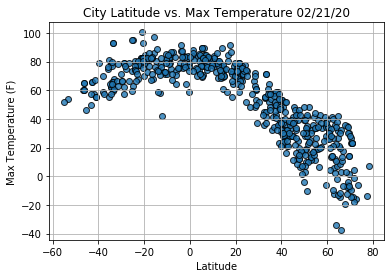

In [11]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

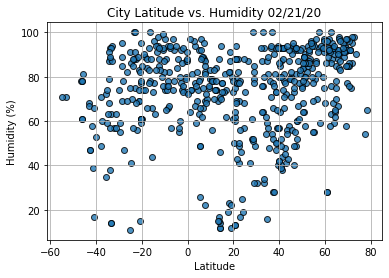

In [12]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

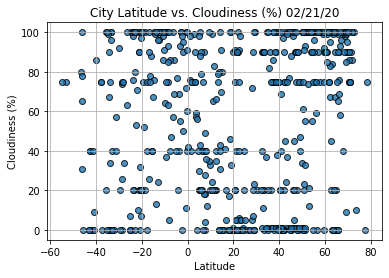

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

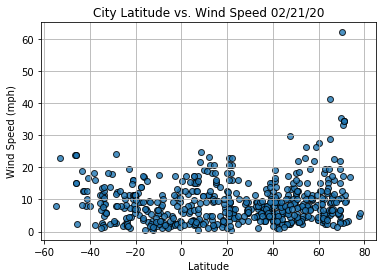

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

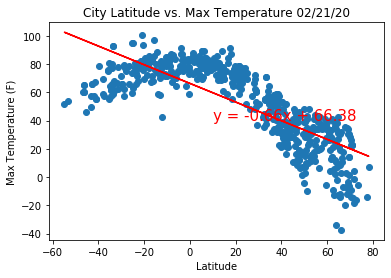

In [15]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, max_temps)

# Calculate the regression line "y values" from the slope and intercept. 
regress_values = lats* slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(lats,max_temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel("Max Temperature (F)")
plt.show()

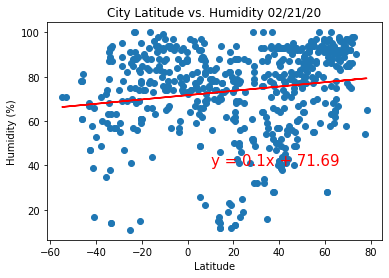

In [16]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, humidity)

# Calculate the regression line "y values" from the slope and intercept. 
regress_values = lats* slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(lats,humidity)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.show()

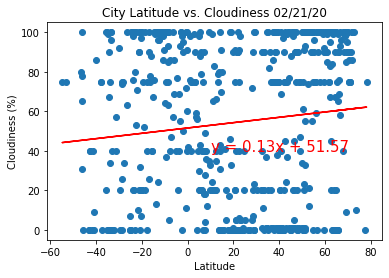

In [17]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, cloudiness)

# Calculate the regression line "y values" from the slope and intercept. 
regress_values = lats* slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(lats,cloudiness)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
plt.show()

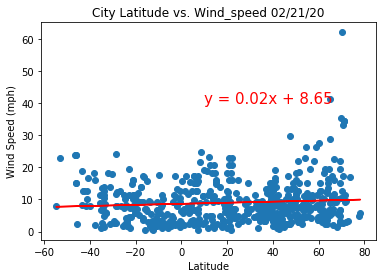

In [18]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, wind_speed)

# Calculate the regression line "y values" from the slope and intercept. 
regress_values = lats* slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(lats,wind_speed)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.title(f"City Latitude vs. Wind_speed "+ time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (mph)")
plt.show()

In [39]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
  

In [20]:
index13 = city_data_df.loc[13]
index13

City                  East London
Country                        ZA
Date          2020-02-21 04:20:22
Lat                        -33.02
Lng                         27.91
Max Temp                       68
Humidity                       94
Cloudiness                     40
Wind Speed                   5.82
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3      False
4       True
       ...  
551    False
552    False
553     True
554     True
555     True
Name: Lat, Length: 556, dtype: bool

In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dikson,RU,2020-02-21 04:20:15,73.51,80.55,-5.93,90,10,17.05
1,Khatanga,RU,2020-02-21 04:20:16,71.97,102.50,4.42,95,100,9.37
4,Pierre,US,2020-02-21 04:19:01,44.37,-100.35,28.40,58,1,5.82
8,Broome,US,2020-02-21 04:20:19,42.25,-75.83,16.00,78,20,4.70
9,Colombia,CU,2020-02-21 04:20:20,20.99,-77.43,71.60,94,0,3.36


In [23]:
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Rikitea,PF,2020-02-21 04:20:16,-23.12,-134.97,78.60,75,80,11.27
3,Sao Jose Da Coroa Grande,BR,2020-02-21 04:20:17,-8.90,-35.15,81.23,76,100,7.63
5,Luganville,VU,2020-02-21 04:20:18,-15.53,167.17,86.00,66,40,6.93
6,Mataura,NZ,2020-02-21 04:20:18,-46.19,168.86,60.01,78,65,24.00
7,Punta Arenas,CL,2020-02-21 04:16:20,-53.15,-70.92,53.60,71,75,23.04


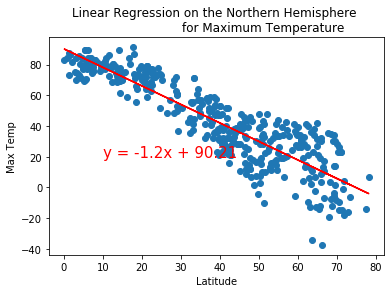

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                        for Maximum Temperature', 'Max Temp',(10,20))


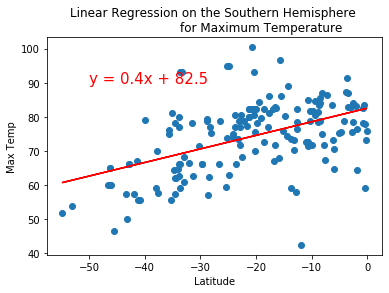

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for Maximum Temperature', 'Max Temp',(-50,90))

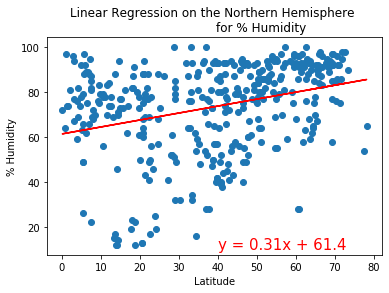

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                        for % Humidity', '% Humidity',(40,10))

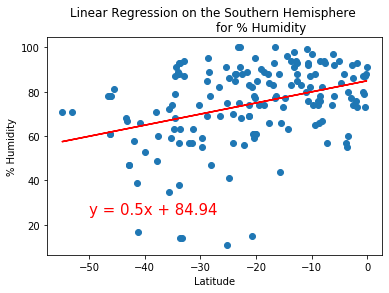

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for % Humidity', '% Humidity',(-50,25))

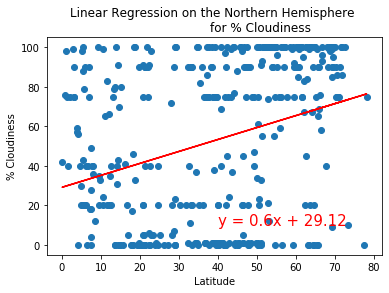

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                        for % Cloudiness', '% Cloudiness',(40,10))

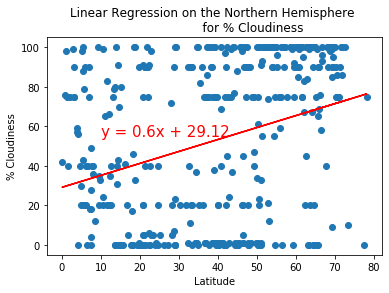

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \n\
                    for % Cloudiness', '% Cloudiness',(10,55))

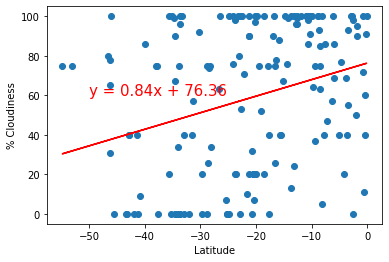

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for % Cloudiness', '% Cloudiness',(-50,60))

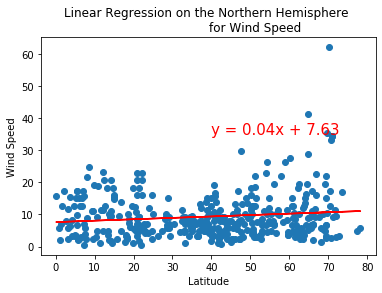

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                        for Wind Speed', 'Wind Speed',(40,35))

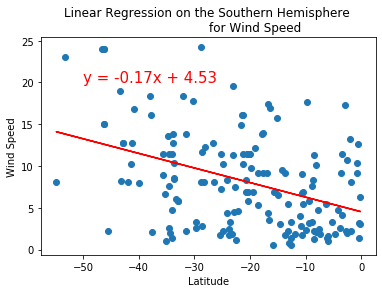

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for Wind Speed', 'Wind Speed',(-50,20))